# Zadowolenie z linii lotniczych

__Opis:__ Zbiór danych opisuje zadowolenie klientów linii lotniczych.

__Zbiór danych zawiera:__ 
    satisfaction,
	Gender,
	Customer Type,
	Age,
	Type of Travel,
	Class,
	Flight Distance,
	Seat comfort,
	Departure/Arrival time convenient,
	Food and drink,
	Gate location,
	Inflight wifi service,
	Inflight entertainment,
	Online support,
	Ease of Online booking,
	On-board service,
	Leg room service,
	Baggage handling,
	Checkin service,
	Cleanliness,
	Online boarding,
	Departure Delay in Minutes,
	Arrival Delay in Minutes

__Przygotowywanie danych do stworzenia modelu:__ Kolumny zawierające zmienne string zostały zmienione na zmienne boolowe lub liczbowe. Dodatkowo usunięto komórki NaN i wprowadzono w nie wartość 0.

__Tworzenie drzew decyzyjnych:__ Wykorzystując wszysktie dane ze zbioru przewidywano poziom satysfakcji klienta z linni lotniczych. Model sprawdzono wykorzystując wskaźnik Giniego oraz Entropię.

Następnie przycięto drzewo decyzyjne, aby uniknąć przetrenowania. Technikami przycinania są: przycinanie maksymalnej gębokości, rozmiar liścia i liczba węzłów liści.


Model drzewa, zgonego z ograniczeniami przedstawiono na grafie.

__Tworzenie lasu losowego:__ stworzono model lasu losowego. Przeprowadzono ewaluacje i znaleziono optymalna liczbę drzew przy zachowaniu wydajnosci. 

Wybrano istotne cechy dla modelu. najważniejszymy były kolejno: Inflight entertainment    0.173599
Seat comfort              0.120732
Ease of Online booking    0.091982
Online support            0.058887

In [9]:
# ladowanie biblioteki pandas, numpy, sklearn, matplotlib
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [10]:
# zaladowanie bazy danych 
df = pd.read_csv('Invistico_Airline.csv')

#prezntcja danych
df[4:]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


__Przygotowywanie danych do dalszych badań__

W wyniku analizy danych zaobserwowano, że zmienne płeć, satysfakcja, typ klienta, typ podróży i klasa należy zamienić na zmienne boolowe lub liczbowe. Dodatkowo w zmiennej Opóżnienie Przylotu nalezy usunąć komórki bez wartości.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [12]:
arr = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
        'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment',
        'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 
        'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
          'satisfaction']].values

tab = []
tab1 = []
tab2 = []

# dla kazdego klienta przyporzadkowuje odpowiedni typ podróży
for i in range(0,129880):
    if (arr[i,3] == 'Personal Travel'):
        tab.append(1)  
    else: 
        tab.append(0)

# dla kazdego klienta przyporzadkowuje odpowiedni typ podróży
for j in range(0,129880):
    if (arr[j,4] == 'Eco'):
        tab1.append(0.0)  
    elif (arr[j,4] == 'Eco Plus'):
        tab1.append(1)
    else: 
        tab1.append(2)

#przygotowywanie danych do regresji (wprowadzanie zmiennych boolowych zamiast string)
df['Male'] = df['Gender'] == 'Male'
df['Loyal Customer'] = df['Customer Type'] == 'Loyal Customer'
df["satisfaction1"] = df['satisfaction'] == 'satisfied'
df['Personal Travel'] = tab
df['Class1'] = tab1
        
#wprowadzanie brakujących danych
df['Arrival Delay in Minutes1'] = df['Arrival Delay in Minutes'].fillna(0)

df[815:]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Loyal Customer,satisfaction1,Personal Travel,Class1,Arrival Delay in Minutes1
815,satisfied,Female,Loyal Customer,9,Personal Travel,Eco,1476,0,1,0,...,2,3,0,0.0,False,True,True,1,0.0,0.0
816,satisfied,Female,Loyal Customer,64,Personal Travel,Eco,530,0,1,0,...,3,2,15,3.0,False,True,True,1,0.0,3.0
817,satisfied,Female,Loyal Customer,21,Personal Travel,Business,1218,0,1,0,...,3,2,0,12.0,False,True,True,1,2.0,12.0
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,1,4,0,NaN,True,True,False,1,0.0,0.0
819,dissatisfied,Male,Loyal Customer,29,Personal Travel,Eco,1565,1,0,1,...,5,5,0,0.0,True,True,False,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,4,2,0,0.0,False,False,True,1,0.0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,2,1,174,172.0,True,False,False,1,2.0,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,3,2,155,163.0,True,False,False,1,0.0,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,1,2,193,205.0,True,False,False,1,0.0,205.0


__Tworzenie modelu drzewa decyzyjnego wykorzystaniu biblioteki _Scikit-learn___ 

In [13]:
#określanie X
X = df[['Male', 'Loyal Customer', 'Age', 'Personal Travel', 'Class1', 'Flight Distance', 'Seat comfort',
        'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment',
        'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 
        'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes1']].values 
# X = df[[ 'Class1', 'Seat comfort', 'Inflight entertainment',
#         'Online support', 'Ease of Online booking']].values 

#okreslanie y
y = df['satisfaction1'].values 

#dzielenie danych na zbiory uczące i testowy (Zawsze ten sam podział)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

#tworzenie modelu
model = tree.DecisionTreeClassifier()
#uczenie modelu drzew decyzyjnych
model = model.fit(X_train, y_train) 

#testowanie modelu i ewaluacja
print(model.score(X_test, y_test))

0.9399753618724976


__Wskaźnik Giniego oraz Entropia__

In [14]:
#utwrozono 5 fragmentów i wprowadzono losową kolejność danych 
kf = KFold(n_splits=5, shuffle=True)

#ewaluacja gini i entropia
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        #tworzenie zmiennych x
        X_train, X_test = X[train_index], X[test_index] 
        #tworenie zmiennych y
        y_train, y_test = y[train_index], y[test_index]
        #model drzew decyzyjnych
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        #ewaluacja
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred)) 
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    #prezentacja dokładności, precyzji itp.
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n') 
#     print() 

Decision Tree - gini
accuracy: 0.9393363104404067
precision: 0.9430840231851599
recall: 0.9462801132773455 

Decision Tree - entropy
accuracy: 0.9411302740991685
precision: 0.946119624360979
recall: 0.9463277270531048 



Wartość _Gini_ dla drzewa decyzyjnego jest mniejsza, wiec jest to lepszy wskaźnik.

__Przycinanie drzewa decyzyjnego__

In [15]:
#określenie dla jakiego modelu otrzymamy najlepsze prognozy
#tworzenie siatki parametrów dla przycinania modelu
param_grid = {
    #przycinanie maksymalnej głębokości (dotyczy rozwijania drzewa tylko do jego określonej wysokości)
    'max_depth': [5, 15, 25],
    #rozmiar liścia (ograniczenie podziału węzła, jeśli liczba próbek w tym węźle jest poniżej określonego progu)
    'min_samples_leaf': [1, 3],
    #liczba węzłów liścia (ograniczenie całkowitej liczby węzłów liści dozwolonych w drzewie)
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()

#przycinanie drzewa  wykorzystująć: model 
#(DecisionTreeClassifier()); siatkę parametrów; sprawdzanie przez dokładność; ilość sprawdzianów kfold do ewaluacji
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
#sprawdzanie modelu
gs = gs.fit(X, y)
#ewaluacja przyciętego modelu
print("best params:", gs.best_params_) 

best params: {'max_depth': 15, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}


Na podstawie paramtrów _GrindSearch_ utworzono model.

In [16]:
#tworzenie modelu
model1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=5, max_leaf_nodes= 10, min_samples_leaf= 1)
#uczenie modelu drzew decyzyjnych
model1 = model1.fit(X_train, y_train)
#ewaluacja
print("accuracy:", model.score(X_test, y_test))

accuracy: 0.9856405913150601


__Wizualizacja modelu drzewa decyzyjne__

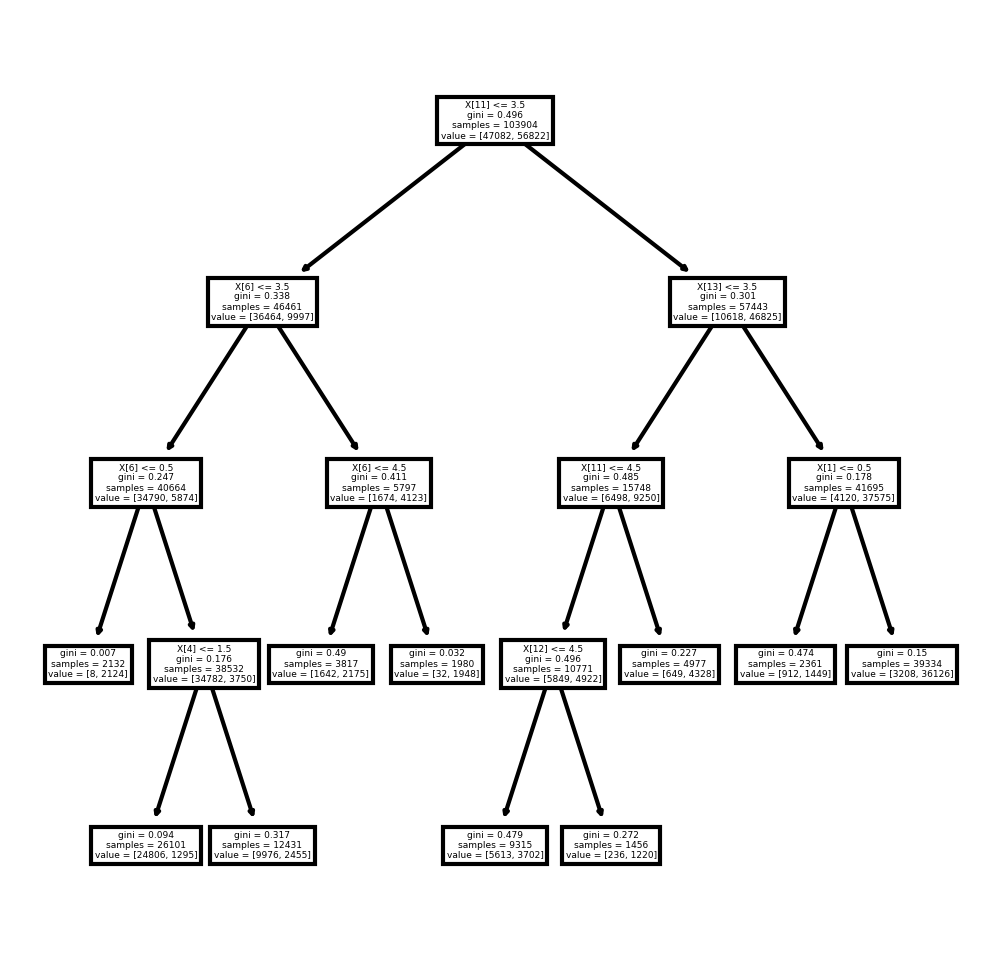

In [17]:
fig, axes = plt.subplots(figsize=(4,4), dpi=300)
tree.plot_tree(model1)
plt.show()

In [18]:
print(tree.export_text(model1))

|--- feature_11 <= 3.50
|   |--- feature_6 <= 3.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: True
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- class: False
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- class: False
|   |--- feature_6 >  3.50
|   |   |--- feature_6 <= 4.50
|   |   |   |--- class: True
|   |   |--- feature_6 >  4.50
|   |   |   |--- class: True
|--- feature_11 >  3.50
|   |--- feature_13 <= 3.50
|   |   |--- feature_11 <= 4.50
|   |   |   |--- feature_12 <= 4.50
|   |   |   |   |--- class: False
|   |   |   |--- feature_12 >  4.50
|   |   |   |   |--- class: True
|   |   |--- feature_11 >  4.50
|   |   |   |--- class: True
|   |--- feature_13 >  3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: True
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: True



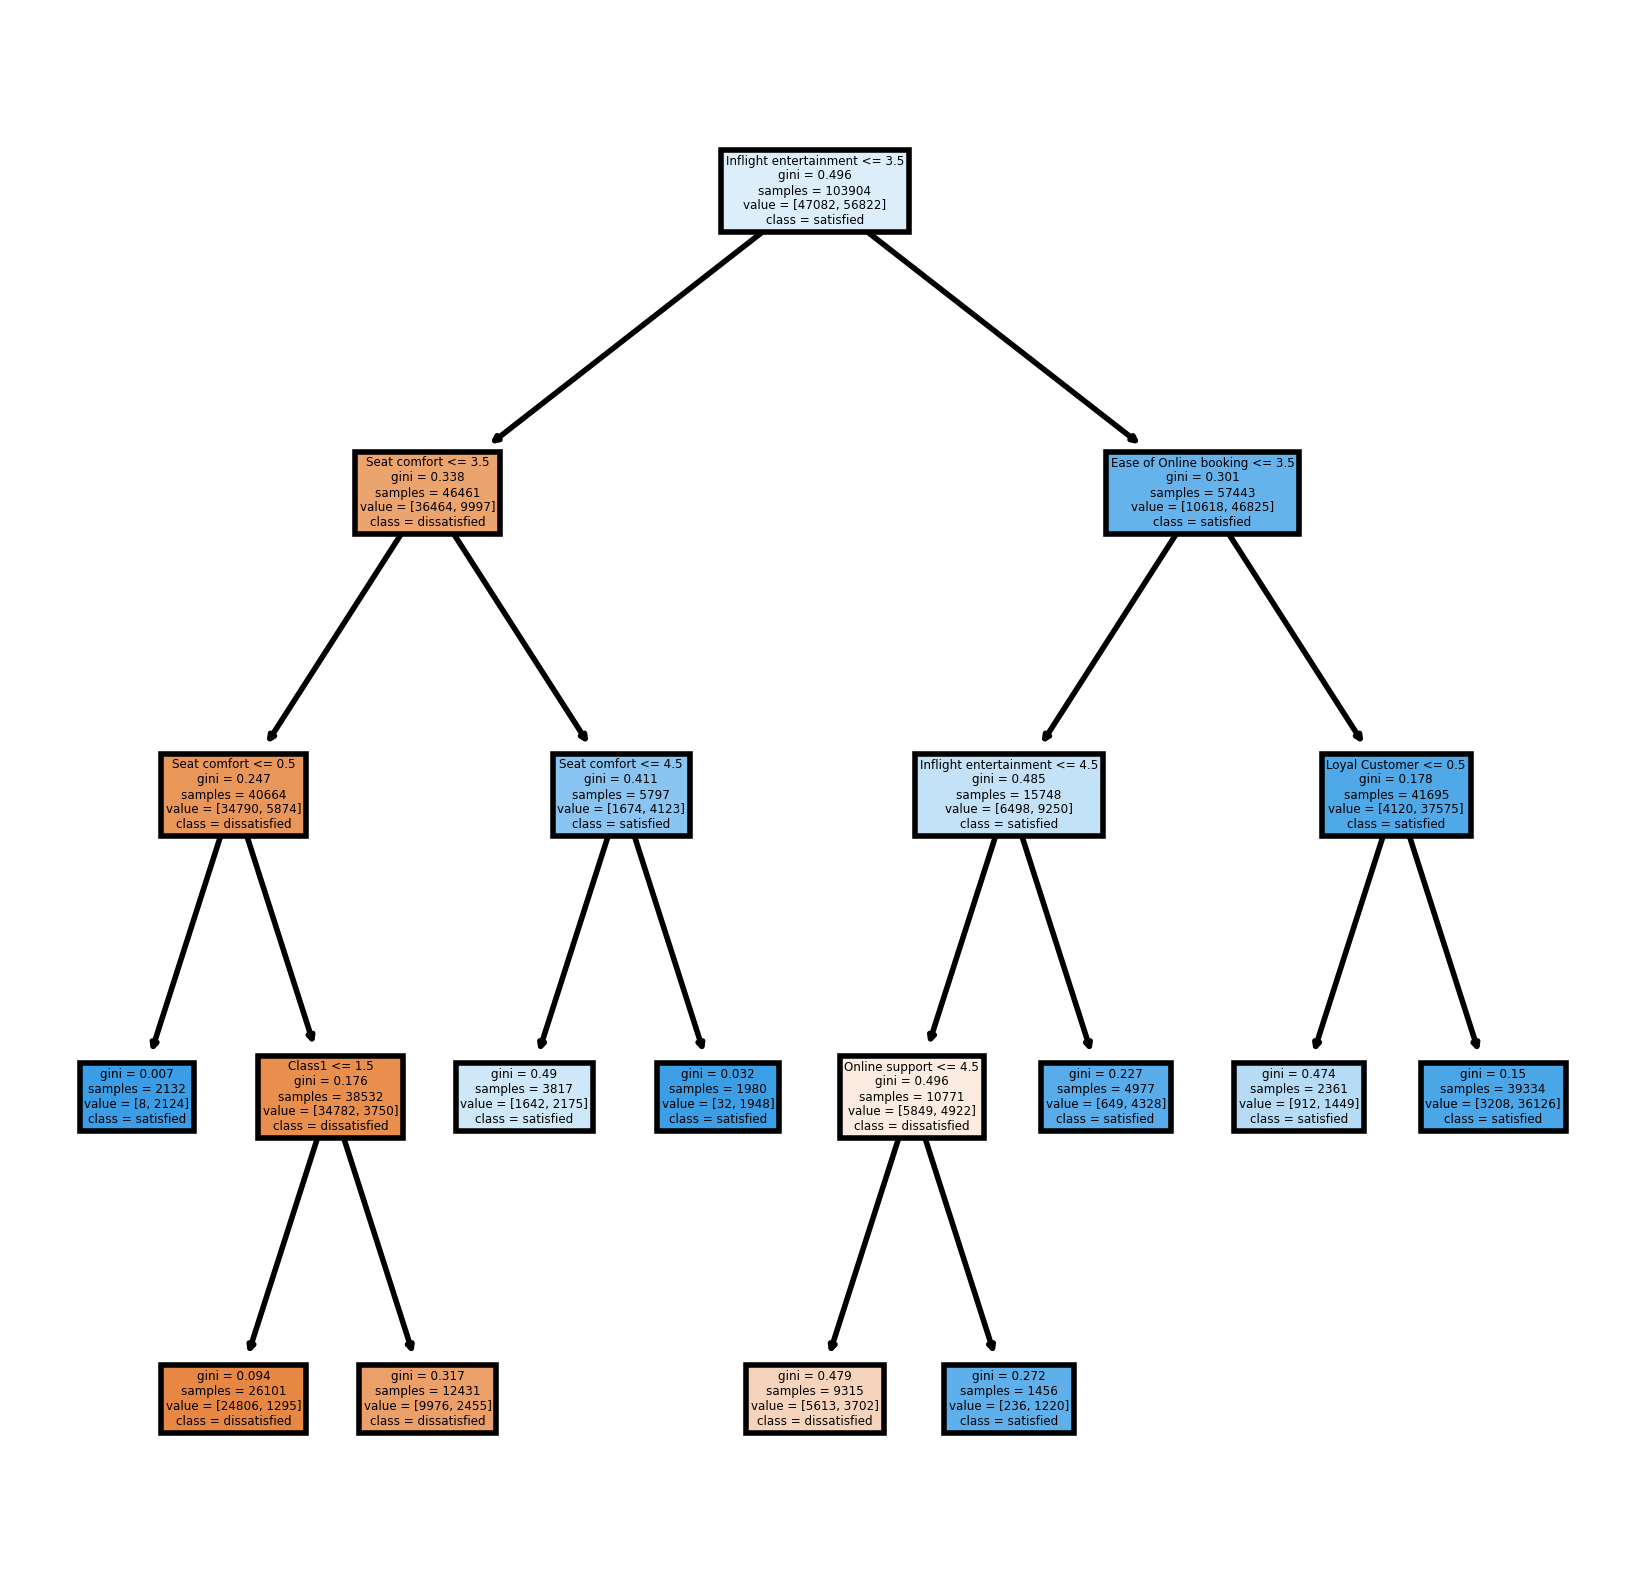

In [19]:
fn=['Male', 'Loyal Customer', 'Age', 'Personal Travel', 'Class1', 'Flight Distance', 'Seat comfort',
        'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment',
        'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 
        'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes1']
# fn = [ 'Class1', 'Seat comfort', 'Inflight entertainment',
#         'Online support', 'Ease of Online booking']
cn = ['dissatisfied', 'satisfied']
fig, axes = plt.subplots(figsize = (5,5), dpi=400)

tree.plot_tree(model1, feature_names = fn, class_names=cn, filled = True);
fig.savefig('imagename.png')

w naszej probce jest 97410 obserwacji, z czego value pokzuje jaki jest ich rozklad dla  satysfakcji. warunek pierwszy spelnia 43228 z nch (na lewo)

In [20]:
#importowanie graphviz,żeby działało
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

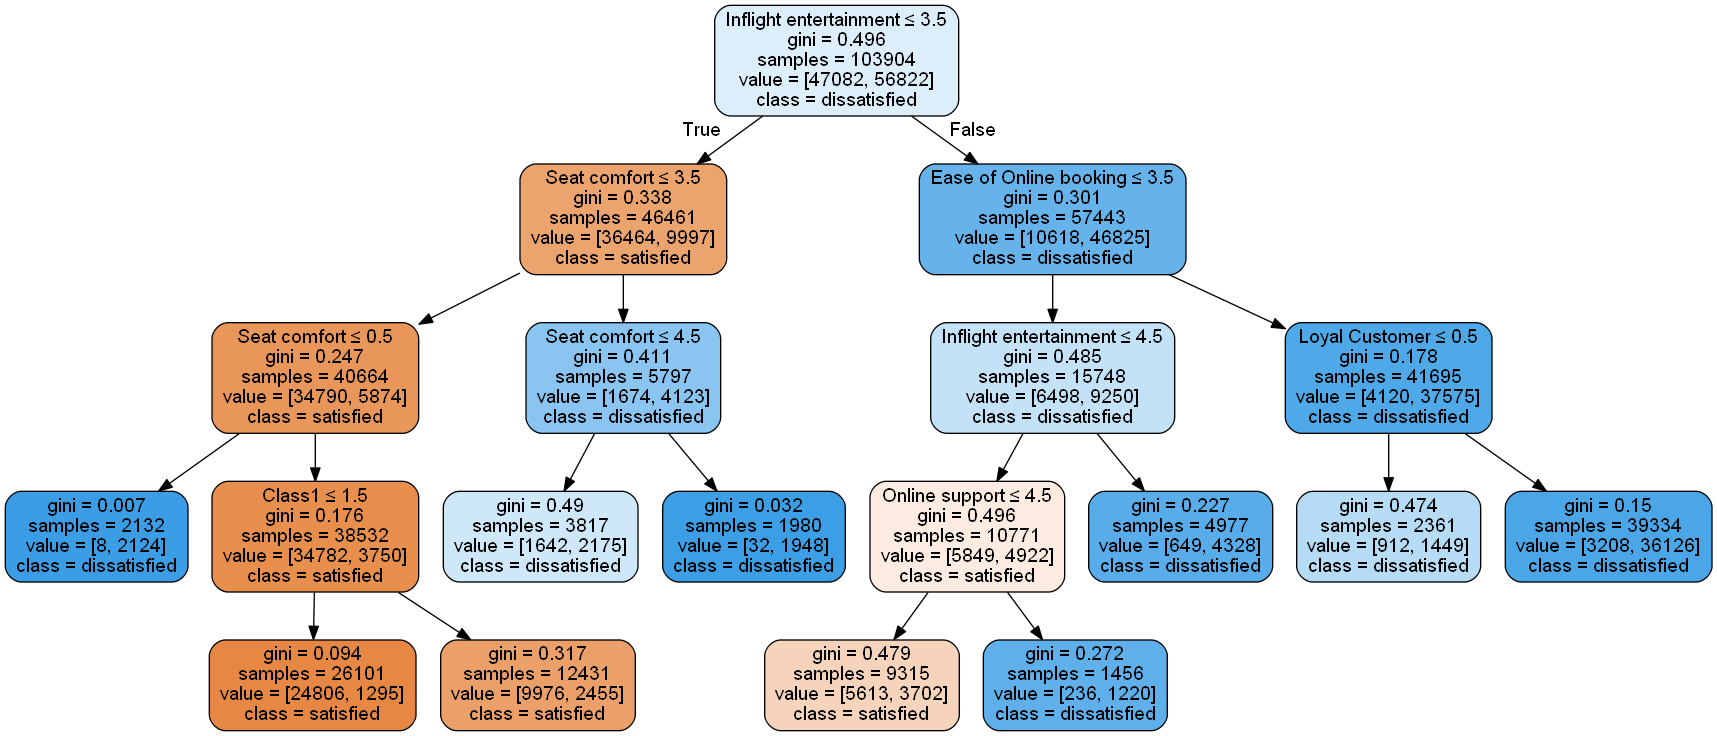

In [21]:
dot_data = StringIO()
#tworzenie grafu z modelu
export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=['satisfied','dissatisfied'])
#definowanie grafu
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#prezentacja grafu
Image(graph.create_png())

__Lasy losowe w bibliotece _Scikit-learn___  

In [22]:
#prezentacja tablicy określającej cel
print('data dimensions', X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

#prognoza na zestawie danych 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("accuracy:", rf.score(X_test, y_test))
# #sprawdzanie dla danych
# first_row = X_test[0]
# print("prediction:", rf.predict([first_row]))
# print("true value:", y_test[0]) 

data dimensions (129880, 22)
accuracy: 0.9577148136741608


__Ewaluacja lasów losowych__

In [13]:
#tworzenie siatki parametrów dla przycinania modelu
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier(random_state=123)
#przycinanie drzewa  wykorzystująć: model (DecisionTreeClassifier());siatkę parametrów; sprawdzanie przez dokładność; ilość sprawdzianów kfold
#do ewaluacji
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_) 

best params: {'n_estimators': 25}


Przycieto las zgodnie z parametrami.

In [14]:
#tworenie modelu
rf = RandomForestClassifier(random_state=123, n_estimators=25)
rf.fit(X_train, y_train)

#ewaluacja
print("accuracy:", rf.score(X_test, y_test))

accuracy: 0.9556513704958424


__Wizualizacja estymatorów__

best_params: {'n_estimators': 55}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0.7171312  0.7183785  0.74008315 0.75231752 0.75330305 0.75799969
 0.75691407 0.75724515 0.76080228 0.75446566 0.75512011 0.76475208
 0.75759932 0.76737758 0.76533723 0.75907761 0.75839236 0.75230982
 0.75712196 0.75963967 0.76419002 0.75461965 0.76733908 0.75592855
 0.76230366 0.75864644 0.76285032 0.757838   0.76301971 0.75756083
 0.75513551 0.76263474 0.75987835 0.76194949 0.75615183 0.76284262
 0.75819988 0.76886357 0.7684786  0.75495072 0.75482753 0.75724515
 0.75999384 0.75934709 0.75333385 0.76079458 0.76392824 0.7552664
 0.76740068 0.76109486 0.76348168 0.74

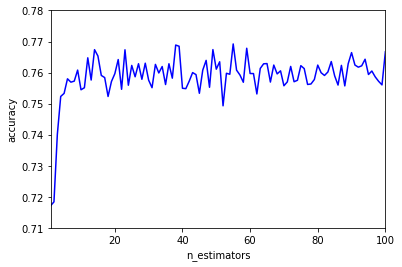

In [24]:
n_estimators = list(range(1, 101))
#poszukiwanie najlepszej wartości dla estymatora
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

#prezentaja najlepszego paramteru
print("best_params:", gs.best_params_)

scores=gs.cv_results_['mean_test_score']
print(n_estimators)
print(scores)

#rysowanie wykresu dla estymatorów
plt.plot(n_estimators, scores,  "b")
#nazwano osie
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
#określono jednostki na osi
plt.xlim(1, 100)
plt.ylim(0.71, 0.78)
#preznetajca modelu
plt.show() 
# plt.savefig('estymatory.png')

najbardziej optymalne jest ok 10 estymatorow.

__Wybór istotnych cech__ - określenie, które zmienne najbardziej wpływają na satysfakcje z lotu

In [23]:
#tworzenie zmiennych
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

#dla estymatora 10 pokazuje najwaznijsze cechy
rf = RandomForestClassifier(n_estimators=20, random_state=111)
rf.fit(X_train, y_train)
#szukanie najważniejszych cech
ft_imp = pd.Series(rf.feature_importances_,
                   index=fn).sort_values(ascending=False)
print("Względne znaczenie cech:")
print(ft_imp.head(10)) 

Względne znaczenie cech:
Inflight entertainment    0.165868
Seat comfort              0.133180
Ease of Online booking    0.101258
Online support            0.070672
Loyal Customer            0.046746
Leg room service          0.044330
On-board service          0.039314
Food and drink            0.038385
Flight Distance           0.035369
Personal Travel           0.031998
dtype: float64
